# Fleet Electrification Landscape 2024
This notebook presents an analysis of the electrification status of logistics fleets based on user testing data from 300 participants across key countries focused on Europe and America, with special emphasis on Scandinavia and Germany.

We explore fleet composition, electrification levels, charging behaviors, driver roles, and software tools used to identify key trends and opportunities for improvement.


In [1]:
#load and inspect data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# Load data
df = pd.read_csv("fleet_user_testing_data.csv")
df = df.drop(columns=["Depot Operation"])

# Show first 5 rows
df.head()

,Gender,Age,Country,Subcontracting Role,Fleet Role,Fleet Type,Industry,Fleet Size,Electrified Percentage,Charging Location,Fleet Planning Software,Charging Behavior,Battery Understanding (1-5),Driver Charging Roles
0,Non-Binary,53,Poland,my fleet is both subcontracted out and has its...,Transport manager,First mile,Food & beverages,20-99,0-10%,planned onsite charging,TomTom Telematics,until they have enough range for the next tour,1,drivers are subject to strict delivery windows...
1,Male,35,Norway,my fleet has no contact with a subcontracted f...,Fleet analyst,First mile,Retail,20-99,0-10%,planned onsite charging,WorkWave Route Manager,until the departure time for the next tour,1,drivers determine when the charging session be...
2,Female,56,Australia,my fleet is subcontracted out to a depot,Driver,mid mile,Food & beverages,100 or more,76-100%,spontaneous offsite charging,Descartes Route Planner,until 100%,4,drivers determine when the charging session be...
3,Non-Binary,47,Australia,my fleet is both subcontracted out and has its...,Logistics manager,last mile,Food & beverages,100 or more,76-100%,spontaneous onsite charging,ORTEC,until 100%,4,drivers are responsible for finding offsite / ...
4,Female,40,Mexico,my fleet is subcontracted out to a depot,Lead Logistics coordinator,last mile,Retail,20-99,51-75%,spontaneous onsite charging,Fleet Complete,until the departure time for the next tour,3,drivers are responsible for finding offsite / ...


The dataset contains 300 participants’ responses with information on demographics, fleet characteristics, charging behavior, and software tools used.

### Proportion of electrified vehicles to fleet size

**UX question:** Do larger fleets tend to have a higher number of electrified vehicles? This may influence the complexity of charging management needed.


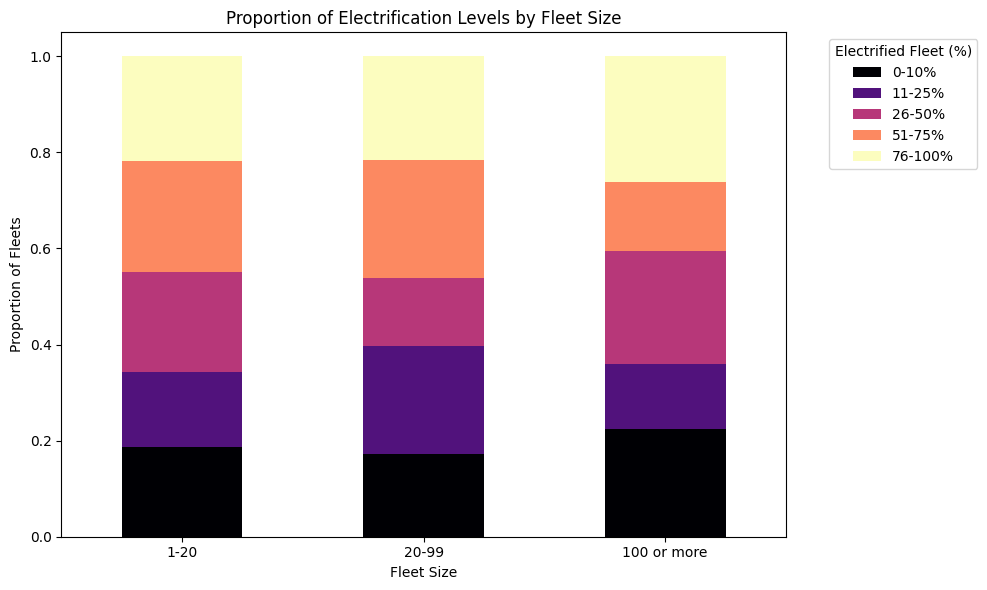

In [2]:
import matplotlib.pyplot as plt

# Ensure Fleet Size is ordered correctly
fleet_size_order = ["1-20", "20-99", "100 or more"]
df['Fleet Size'] = pd.Categorical(df['Fleet Size'], categories=fleet_size_order, ordered=True)

# Create crosstab with normalized proportions
cross_tab_pct = pd.crosstab(df['Fleet Size'], df['Electrified Percentage'], normalize='index')

# Reindex to match desired order
cross_tab_pct = cross_tab_pct.reindex(fleet_size_order)

# Plot
cross_tab_pct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='magma')

plt.title("Proportion of Electrification Levels by Fleet Size")
plt.ylabel("Proportion of Fleets")
plt.xlabel("Fleet Size")
plt.legend(title="Electrified Fleet (%)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Above we can see some patterns to the levels of electrification of the fleets sampled- small and moderately sized fleets tend to have mostly moderately electrified (51-75% of vehicles), and large fleets with over 100 vehicles have an almost equal likelihood of having barely electrified, having electrified a quarter to a half of all vehicles, or having almost completely electrified 

**UX question:** What charging behaviors dominate? Does the preference for charging until 100% or just enough range suggest opportunities for app features or training?


/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_13139/4098634339.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


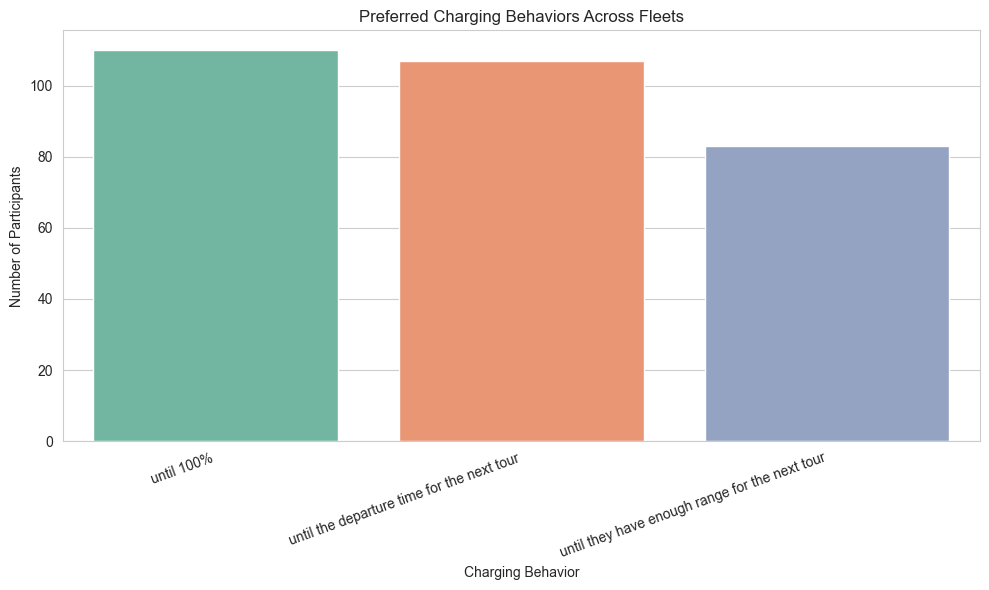

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure and style
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Count values
charge_behavior_counts = df['Charging Behavior'].value_counts()

# Plot with updated palette and cleaner layout
sns.barplot(
    x=charge_behavior_counts.index,
    y=charge_behavior_counts.values,
    palette='Set2'
)

# Label formatting
plt.title("Preferred Charging Behaviors Across Fleets")
plt.ylabel("Number of Participants")
plt.xlabel("Charging Behavior")
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

plt.show()


Now let's look at the driver autonomy, since we do not know if the above item is informed by fleet policy or by the driver behaviour itself

/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_13139/3440134980.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=role_df, y="Driver Role", x="Count", palette="crest")


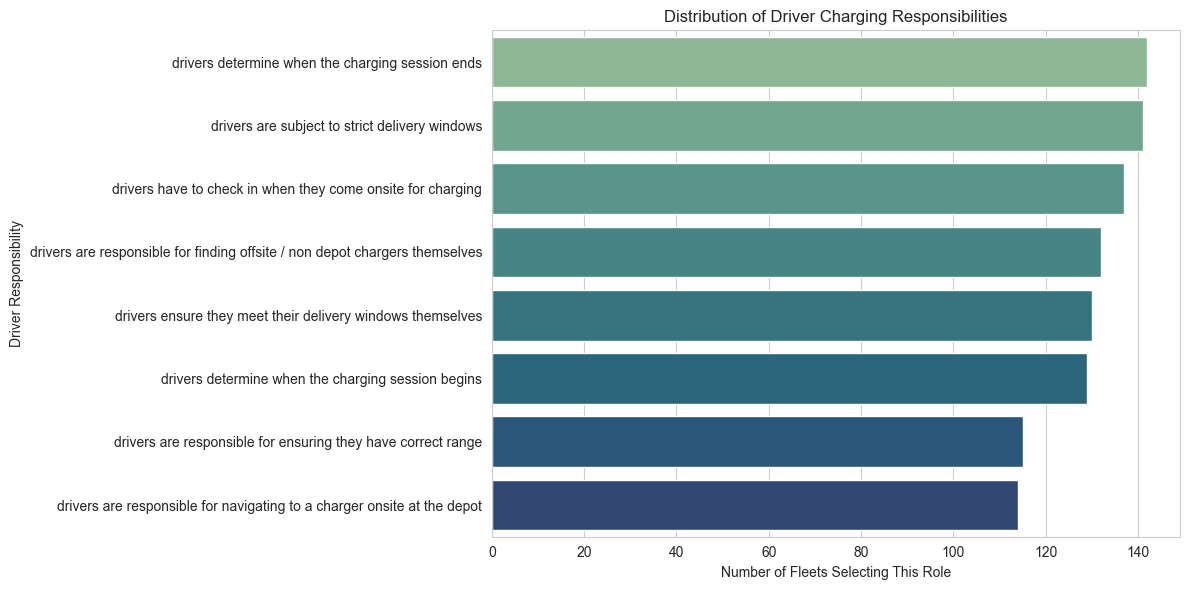

In [4]:
# Split and flatten the multi-select answers
all_roles = df['Driver Charging Roles'].dropna().str.split(', ')
flat_roles = [role for sublist in all_roles for role in sublist]

# Count occurrences
role_counts = Counter(flat_roles)
role_df = pd.DataFrame(role_counts.items(), columns=["Driver Role", "Count"]).sort_values(by="Count", ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=role_df, y="Driver Role", x="Count", palette="crest")
plt.title("Distribution of Driver Charging Responsibilities")
plt.xlabel("Number of Fleets Selecting This Role")
plt.ylabel("Driver Responsibility")
plt.tight_layout()
plt.show()

This item was a difficult one to do without in-depth interviewing, but necessary to get some overarching insights- as is shown here, for just over half of the sample drivers themselves determine when the charging session ends and just over half are also subject to strict delivery windows-possibly showing that the split for more regulated drivers and more autonomous is 50/50- further drilling down is required to truly show this

***Lets look at the geography to see if theres a pattern in different countries***

<Figure size 1200x800 with 0 Axes>

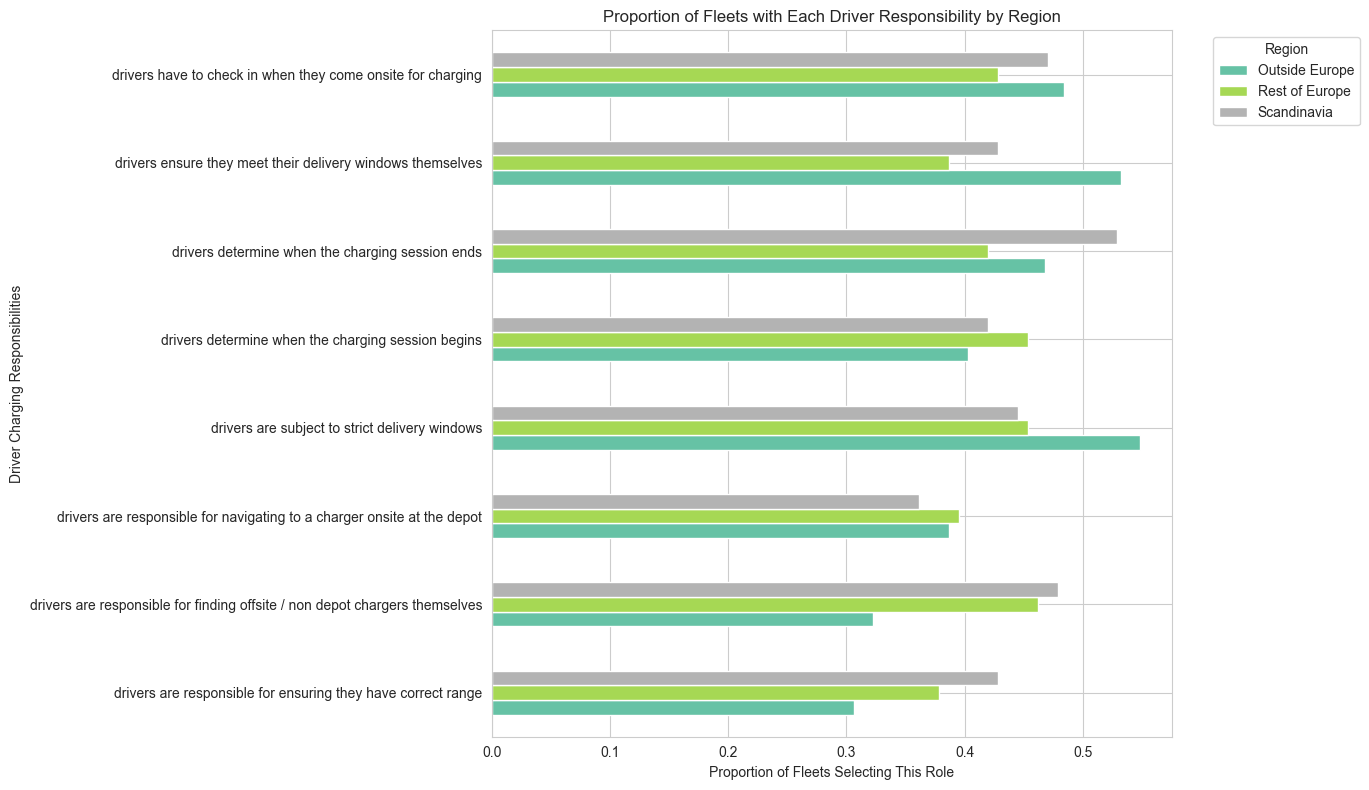

In [5]:
# Define regional groups
scandinavia = ['Sweden', 'Norway', 'Finland', 'Denmark']
europe = ['Germany', 'France', 'Netherlands', 'UK', 'Spain', 'Italy', 'Belgium', 'Austria', 'Switzerland', 'Ireland', 'Poland'] + scandinavia

def classify_region(country):
    if country in scandinavia:
        return 'Scandinavia'
    elif country in europe:
        return 'Rest of Europe'
    else:
        return 'Outside Europe'

# Add region column
df['Region'] = df['Country'].apply(classify_region)

# Extract binary indicators for each role
all_roles = df['Driver Charging Roles'].dropna().str.get_dummies(sep=', ')
df_roles = pd.concat([df[['Region']], all_roles], axis=1)

# Compute proportions
role_proportions = df_roles.groupby("Region").mean().T  # Transpose for plotting

# Plot grouped bar chart
plt.figure(figsize=(12,8))
role_proportions.plot(kind='barh', figsize=(14,8), colormap='Set2')

plt.title("Proportion of Fleets with Each Driver Responsibility by Region")
plt.xlabel("Proportion of Fleets Selecting This Role")
plt.ylabel("Driver Charging Responsibilities")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**UX question:** What is the overall level of driver understanding of EV battery range? Is there room for educational features or in-app prompts to support drivers?


/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_13139/2885502253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Battery Understanding (1-5)', palette='Blues')


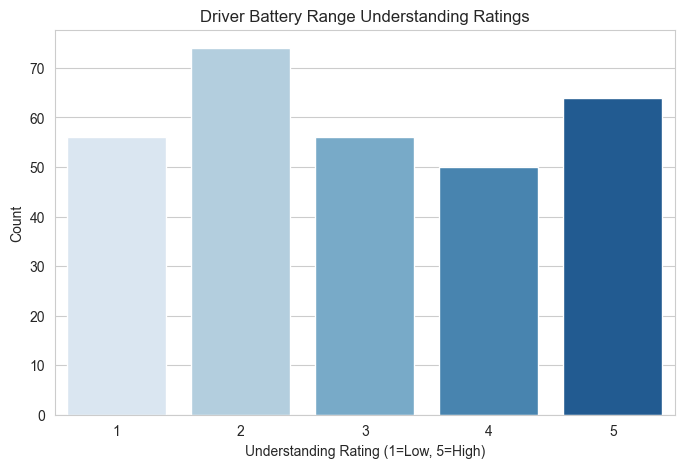

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Battery Understanding (1-5)', palette='Blues')
plt.title("Driver Battery Range Understanding Ratings")
plt.xlabel("Understanding Rating (1=Low, 5=High)")
plt.ylabel("Count")
plt.show()


This shows moderately even distribution between the different options for the question, which is good, but gives no insight into what impacts driver range comprehension- so I will now use the proportion of electrified vehicles in the fleet to inform these answers and see what comes out

/var/folders/z3/smzjm1wn7sdbw5trxnn2tfjr0000gn/T/ipykernel_13139/3145206077.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


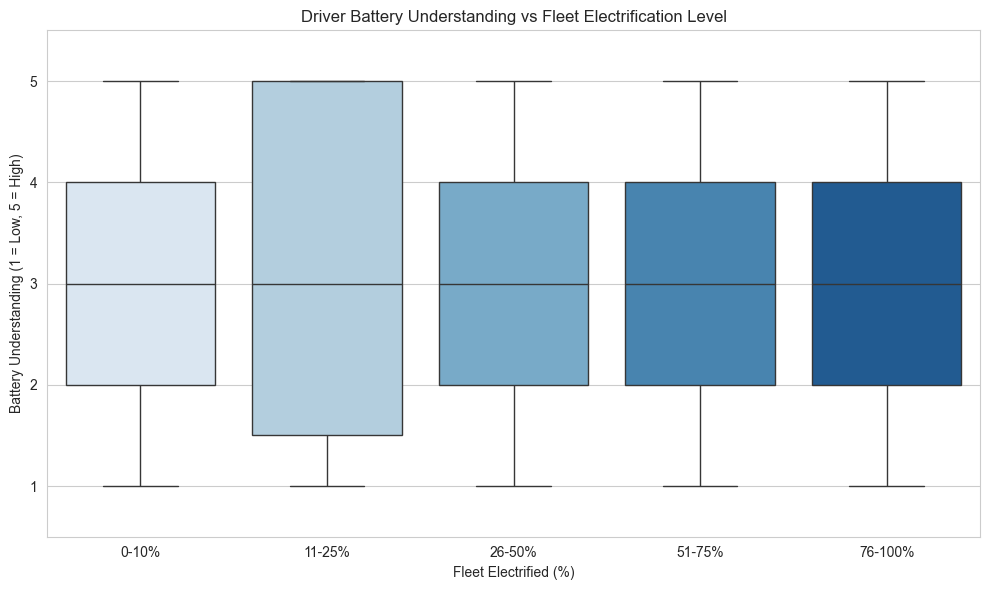

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure ordered category for plotting
electrified_order = ["0-10%", "11-25%", "26-50%", "51-75%", "76-100%"]
df['Electrified Percentage'] = pd.Categorical(df['Electrified Percentage'], categories=electrified_order, ordered=True)

# Plot
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='Electrified Percentage',
    y='Battery Understanding (1-5)',  # Replace with actual name
    palette='Blues'
)

plt.title("Driver Battery Understanding vs Fleet Electrification Level")
plt.xlabel("Fleet Electrified (%)")
plt.ylabel("Battery Understanding (1 = Low, 5 = High)")
plt.ylim(0.5, 5.5)
plt.tight_layout()
plt.show()



Interestingly, in all cases of fleet percentage of electrification, the distribution of driver understanding of range was looking normal (distributed in such a way that there was no skew either way), except for in the case of fleets with 11-25% of electrification, where the majority of drivers were thought to have very high understanding of how the range on their vehicles work. 

Possible follow up research questions could be- what categories of fleets are these (first mile, mid mile, last mile)? An hypothesis here would be that first mile drivers may have a better understanding for their electric vehicles ranges, because the scenario for running out of battery is more dire.

In [8]:
import plotly.express as px

# Columns for industry and roles
industry_col = "Industry"
role_col = "Fleet Role"

# Clean column names if needed
df[industry_col] = df[industry_col].astype(str)
df[role_col] = df[role_col].astype(str)

# Create counts for each Industry-Role pair
sunburst_data = df.groupby([industry_col, role_col]).size().reset_index(name='Count')

# Plot Sunburst
fig = px.sunburst(
    sunburst_data,
    path=[industry_col, role_col],
    values='Count',
    color=industry_col,
    title="Sunburst Chart of Fleet Roles by Industry",
)

fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()


In [11]:
fig.write_image("sunburst_chart.png")  # Save as PNG


In [ ]:
# Bin Electrified Percentage for clearer categories
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']
df['Electrified_Percent_Bin'] = pd.cut(df['Electrified Percentage'], bins=bins, labels=labels, include_lowest=True)

fig = px.parallel_categories(
    df,
    dimensions=['Fleet Size', 'Electrified_Percent_Bin', 'Industry'],
    color='Electrified Percentage',
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={'Electrified_Percent_Bin': 'Electrification Level'}
)

fig.update_layout(title='Parallel Categories Diagram: Fleet Size, Electrification Level, and Industry')
fig.show()
